In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import missingno as msno

In [2]:
train_raw = pd.read_csv('train.csv', encoding = 'utf-8')    
test_raw = pd.read_csv('test.csv', encoding = 'utf-8')
submission_raw = pd.read_csv('sample_submission.csv', encoding = 'utf-8')

In [3]:
train=train_raw.copy()
test=test_raw.copy()
submission=submission_raw.copy()

In [4]:
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [5]:
#컬럼명 변경
train.columns = ['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'brk', 'ln', 'dn', 'target_ln', 'target_dn']
test.columns = ['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'brk', 'ln', 'dn']

In [6]:
#날짜
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [7]:
str_match = list(filter(lambda x: '날' in x, train['ln']))
print(str_match)

['쌀밥/잡곡밥 (쌀:국내산) 오징어국  유자청제육볶음 (돼지고기:국내산) 날치알계란찜  상추파채무침  포기김치 (김치:국내산)   ', '쌀밥/잡곡밥 (쌀:국내산) 얼갈이국  쇠고기낙지볶음  날치알계란찜  비름나물  포기김치 (김치:국내산) ', '쌀밥/잡곡밥 (쌀:국내산) 꽃게탕  언양식불고기  날치알계란찜  호박나물  포기김치 (김치:국내산) ', '쌀밥/잡곡밥 (쌀:국내산) 꽃게된장찌개  돈육굴소스볶음  날치알계란찜  꽃상추겉절이  포기김치 (김치:국내산) ', '쌀밥/옛날돈까스 (쌀,돈육:국내산) 옥수수스프  딸기드레싱샐러드  감자범벅  수제피클/음료  포기김치 (김치:국내산) ', '건강비빔밥*약고추장 (쌀,현미,흑미:국내산) 제첩두부국  깻잎전  황태채마늘쫑무침  배추겉절이 (배추,고추가루:국내산) *잔반없는날* 이벤트행사 ', '새우날치알볶음밥 (쌀,돈민찌:국내산) 쌀국수(숙주들어감)  장어구이*소스  춘권튀김*칠리드레질  오이무초무침 망고,복숭아아이스티 배추김치 (배추,고추가루:국내산) ']


In [8]:
str_match = list(filter(lambda x: '날' in x, train['dn']))
print(str_match)

['쌀밥/잡곡밥 (쌀:국내산) 북어국  고추장불고기  모듬양채쌈  날치알계란찜  포기김치 (김치:국내산) ', '날치알볶음밥 (쌀:국내산) 유부장국  고추잡채*꽃빵 (쇠고기:호주산) 땅콩조림  오렌지  배추겉절이 (김치:국내산) ', '쌀밥/잡곡밥 (쌀:국내산) 콩나물국  소불고기  날치알계란찜  양배추쌈*쌈장  포기김치 (김치:국내산) ', '쌀밥/잡곡밥 (쌀:국내산) 콩비지찌개  돈육굴소스볶음  날치알계란찜  무말랭이무침  열무김치 (김치:국내산) ', '옛날왕돈까스 (쌀:국내산) 옥수수스프  샐러드파스타  감자치즈오븐구이  오이피클  포기김치 (김치:국내산) ', '날치알김치볶음밥 (쌀:국내산) 미역장국  쇠고기퀘사디아  꽃맛살샐러드  음료  포기김치 (김치:국내산) ', '쌀밥/잡곡밥 (쌀:국내산) 옛날돈가스  옥수수스프  고구마범벅  양배추샐러드/음료  포기김치 (김치:국내산) ', '      자기계발의날      ', '      *자기계발의날*      ', '      가정의날      ', '쌀밥/잡곡밥 (쌀:국내산) 옛날돈까스  브로컬리크림스프  키위드레싱샐러드  고구마범벅/무피클 음료 포기김치 (김치:국내산) ', '쌀밥/잡곡밥 (쌀:국내산) 옛날왕돈까스  크림스프  감자범벅/오이피클  과일샐러드  알타리김치 (김치:국내산) ', '날치알김치볶음밥 (쌀:국내산) 어묵우동  새우또띠아  시저샐러드  피크닉  포기김치 (김치:국내산) ', '쌀밥/잡곡밥 (쌀:국내산) 옛날왕돈까스  옥수수스프  감자범벅/오이피클  키위드레싱샐러드  포기김치 (김치:국내산) ', '쌀밥/잡곡밥 (쌀:국내산) 고추장찌개  언양식불고기  날치알계란찜  양배추쌈*쌈장  포기김치 (김치:국내산) ', '쌀밥/잡곡밥 (쌀:국내산) 옛날돈가스  단호박스프  샐러드파스타  단무지/음료  포기김치 (김치:국내산) ', '쌀밥/잡곡밥 (쌀:국내산) 옛날돈까스  미소장국  딸기드레싱샐러드  감자범벅/무피클 주스 포기김치 (김치:국내산) ', '    자기계발의날        ',

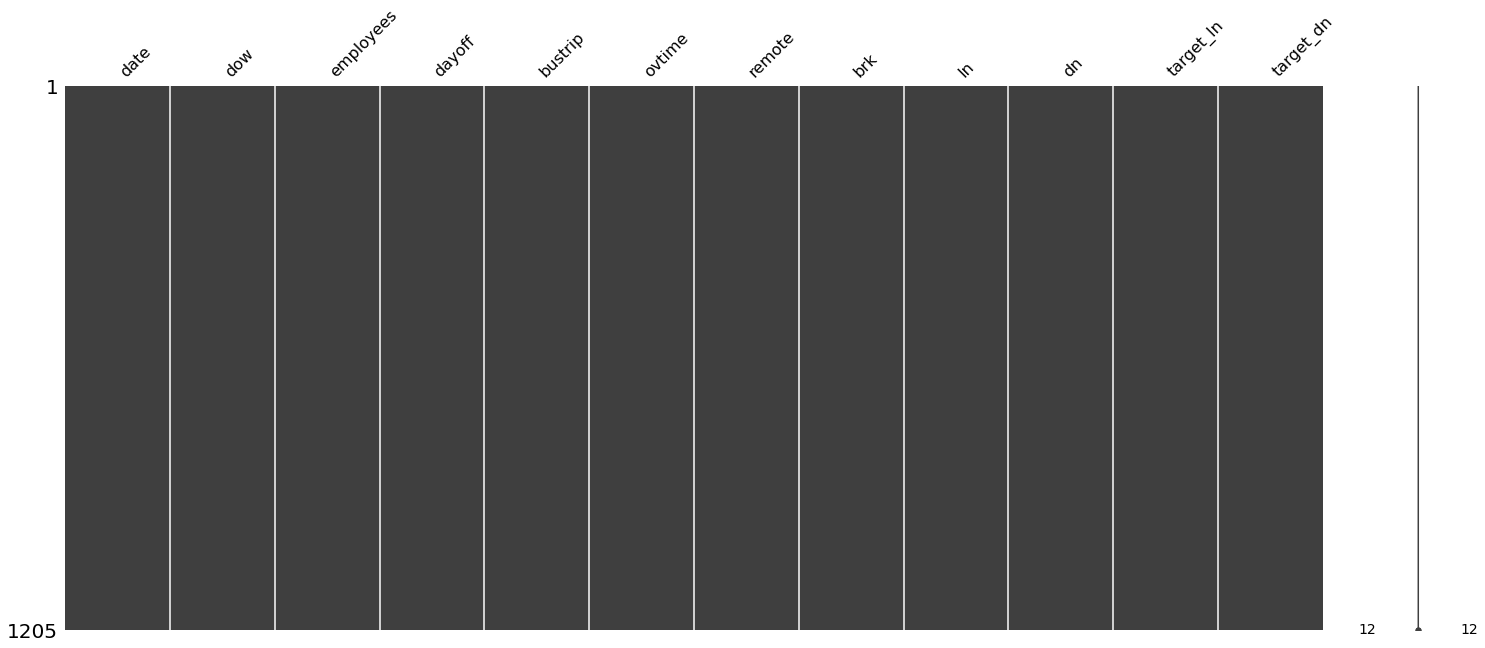

In [9]:
msno.matrix(train)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2a050402850>,
 'caps': [<matplotlib.lines.Line2D at 0x2a050402f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a0504024c0>,
 'medians': [<matplotlib.lines.Line2D at 0x2a050412610>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a050412970>,
 'means': []}

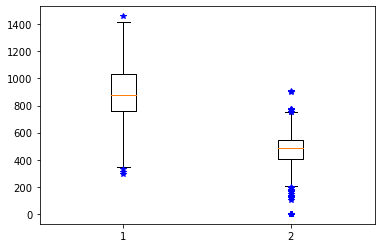

In [10]:
fig, ax = plt.subplots()
ax.boxplot([train['target_ln'], train['target_dn']], sym="b*")

In [11]:
train.head(10)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn,target_ln,target_dn
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0
6,2016-02-12,금,2601,389,156,93,0.0,모닝롤/야채샌드 우유/두유/주스 계란후라이 고구마죽/쌀밥 (쌀:국내산) 봄동된...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국 미니함박 어묵볶음 물파래무침 ...",909.0,598.0
7,2016-02-15,월,2601,87,204,482,0.0,모닝롤/치즈프레즐 우유/두유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 민물새우...,쌀밥/잡곡밥 (쌀:국내산) 시금치국 닭감자조림 (닭고기:국내산) 연두부*양념장 ...,"쌀밥/잡곡밥 (쌀:국내산) 홍합미역국 등갈비김치찜 (돼지고기,김치:국내산) 임연수...",1268.0,672.0
8,2016-02-16,화,2601,72,236,526,0.0,모닝롤/마늘빵 우유/두유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 어묵국 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 쇠불고기 (쇠고기:호주산) 해파리겨자채 봄동...,1014.0,523.0
9,2016-02-17,수,2601,78,250,23,0.0,모닝롤/참치샌드 우유/두유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 북어계...,쌀밥/잡곡밥 (쌀:국내산) 냉이된장국 쇠고기장조림 (쇠고기:호주산) 통도라지구이 ...,볶음밥*자장소스 (쌀:국내산) 맑은국 새우또띠아 쨔샤이무침 요플레 포기김치 ...,916.0,588.0


In [12]:
breakfast = []
for day in range(len(train)):
    tmp = train.iloc[day, 7].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제

    search = '('   # 원산지 정보는 삭제
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    breakfast.append(tmp) 

In [13]:
print(breakfast[0])

['모닝롤/찐빵', '우유/두유/주스', '계란후라이', '호두죽/쌀밥', '된장찌개', '쥐어채무침', '포기김치']


In [14]:
bread = []; milk = [];  egg = []; bob = []; gook = []; banchan = []; kimchi = []
for i, day_menu in enumerate(breakfast):
    bread_tmp = day_menu[0]; bread.append(bread_tmp)
    milk_tmp = day_menu[1]; milk.append(milk_tmp)
    egg_tmp = day_menu[2]; egg.append(egg_tmp)
    bob_tmp = day_menu[3]; bob.append(bob_tmp)
    gook_tmp = day_menu[4]; gook.append(gook_tmp)
    banchan_tmp = day_menu[5]; banchan.append(banchan_tmp)
    kimchi_tmp = day_menu[6]; kimchi.append(kimchi_tmp)

In [15]:
train_bf = train[['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'target_ln']]
train_bf['bread'] = bread
train_bf['milk'] = milk
train_bf['egg'] = egg
train_bf['bob'] = bob
train_bf['gook'] = gook
train_bf['banchan'] = banchan
train_bf['kimchi'] = kimchi

<ipython-input-15-ee7bf50a53f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_bf['bread'] = bread
<ipython-input-15-ee7bf50a53f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_bf['milk'] = milk
<ipython-input-15-ee7bf50a53f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [16]:
train_bf.head()

,date,dow,employees,dayoff,bustrip,ovtime,remote,target_ln,bread,milk,egg,bob,gook,banchan,kimchi
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,모닝롤/찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,포기김치
1,2016-02-02,화,2601,50,173,319,0.0,867.0,모닝롤/단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,포기김치
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,모닝롤/베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,포기김치
3,2016-02-04,목,2601,104,220,355,0.0,978.0,모닝롤/토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,포기김치
4,2016-02-05,금,2601,278,181,34,0.0,925.0,모닝롤/와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,포기김치


In [17]:
for day in range(len(train_bf)):
    tmp = train_bf.iloc[day, 8].split('/')

print(tmp)

['모닝롤', '야채샌드']


In [18]:
train_bf.head()

,date,dow,employees,dayoff,bustrip,ovtime,remote,target_ln,bread,milk,egg,bob,gook,banchan,kimchi
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,모닝롤/찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,포기김치
1,2016-02-02,화,2601,50,173,319,0.0,867.0,모닝롤/단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,포기김치
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,모닝롤/베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,포기김치
3,2016-02-04,목,2601,104,220,355,0.0,978.0,모닝롤/토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,포기김치
4,2016-02-05,금,2601,278,181,34,0.0,925.0,모닝롤/와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,포기김치


In [19]:
corr1=train_bf.corr()
print(corr1)

           employees    dayoff   bustrip    ovtime    remote  target_ln
employees   1.000000  0.244666 -0.061688  0.146544  0.452293  -0.115529
dayoff      0.244666  1.000000 -0.273318 -0.230789  0.065397  -0.391975
bustrip    -0.061688 -0.273318  1.000000 -0.308757 -0.352643  -0.512680
ovtime      0.146544 -0.230789 -0.308757  1.000000  0.156792   0.535611
remote      0.452293  0.065397 -0.352643  0.156792  1.000000   0.076509
target_ln  -0.115529 -0.391975 -0.512680  0.535611  0.076509   1.000000


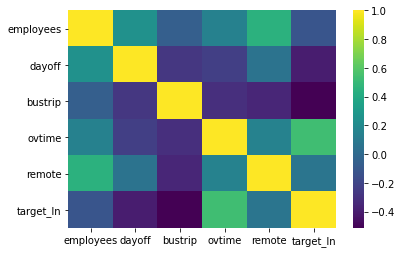

In [20]:
sns.heatmap(corr1, cmap='viridis')
plt.show()

In [21]:
lunch = []
for day in range(len(train)):
    tmp = train.iloc[day, 8].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제

    search = '('   # 원산지 정보는 삭제
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    lunch.append(tmp) 

In [22]:
bob = []; gook = []; banchan1 = []; banchan2 = []; banchan3 = []; kimchi = []; side = []
for i, day_menu in enumerate(lunch):
    bob_tmp = day_menu[0]; bob.append(bob_tmp)
    gook_tmp = day_menu[1]; gook.append(gook_tmp)
    banchan1_tmp = day_menu[2]; banchan1.append(banchan1_tmp)
    banchan2_tmp = day_menu[3]; banchan2.append(banchan2_tmp)
    banchan3_tmp = day_menu[4]; banchan3.append(banchan3_tmp)

    if i < 1067:
        kimchi_tmp = day_menu[-1]; kimchi.append(kimchi_tmp)
        side_tmp = day_menu[-2]; side.append(side_tmp)
    else: 
        kimchi_tmp = day_menu[-2]; kimchi.append(kimchi_tmp)
        side_tmp  = day_menu[-1]; side.append(side_tmp)

In [100]:
train_ln = train[['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'target_ln']]
train_ln['bob'] = bob
train_ln['gook'] = gook
train_ln['banchan1'] = banchan1; train_ln['banchan2'] = banchan2; train_ln['banchan3'] = banchan3
train_ln['kimchi'] = kimchi 
train_ln['side'] = side

<ipython-input-100-731e6240ea63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ln['bob'] = bob
<ipython-input-100-731e6240ea63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ln['gook'] = gook
<ipython-input-100-731e6240ea63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [101]:
train_ln.head()

,date,dow,employees,dayoff,bustrip,ovtime,remote,target_ln,bob,gook,banchan1,banchan2,banchan3,kimchi,side
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,포기김치,요구르트
1,2016-02-02,화,2601,50,173,319,0.0,867.0,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,배추겉절이,요구르트
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,포기김치,요구르트
3,2016-02-04,목,2601,104,220,355,0.0,978.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,포기김치,요구르트
4,2016-02-05,금,2601,278,181,34,0.0,925.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,포기김치,요구르트


In [25]:
corr2= train_ln.corr()
print(corr2)

           employees    dayoff   bustrip    ovtime    remote  target_ln
employees   1.000000  0.244666 -0.061688  0.146544  0.452293  -0.115529
dayoff      0.244666  1.000000 -0.273318 -0.230789  0.065397  -0.391975
bustrip    -0.061688 -0.273318  1.000000 -0.308757 -0.352643  -0.512680
ovtime      0.146544 -0.230789 -0.308757  1.000000  0.156792   0.535611
remote      0.452293  0.065397 -0.352643  0.156792  1.000000   0.076509
target_ln  -0.115529 -0.391975 -0.512680  0.535611  0.076509   1.000000


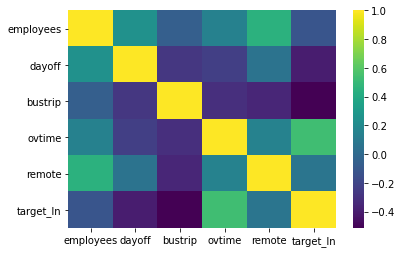

In [26]:
sns.heatmap(corr2, cmap='viridis')
plt.show()

In [102]:
#target_ln 내림차순 100일
top100_ln = train_ln.sort_values('target_ln',ascending =False).head(100)

In [103]:
top100_ln_banchan = top100_ln[['target_ln','banchan1','banchan2','banchan3']]

In [105]:
top100_ln_banchan

,target_ln,banchan1,banchan2,banchan3
735,1459.0,소불고기,계란말이,실곤약초무침
490,1417.0,가래떡돼지갈비찜,콩나물겨자채,참나물무침
1188,1405.0,봉추찜닭,오미산적/동태전,콩나물잡채
495,1372.0,돈육볶음,홍어채무침,시래기조림
986,1370.0,유자청제육볶음,우엉잡채,미역오이초무침
...,...,...,...,...
870,1221.0,함박스테이크,사과고구마그라탕,콩나물무침
631,1221.0,돈육간장불고기,홍어채무침,어묵볶음
807,1219.0,돈육콩나물불고기,시금치프리타타,쫑상추무침
294,1218.0,쇠고기낙지볶음,날치알계란찜,비름나물
